In [3]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [4]:
a_renomear = {'mileage_per_year': 'milhas_por_ano',
              'model_year': 'ano_do_modelo',
              'price': 'preco',
              'sold':'vendido'}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
a_trocar = {'no':0, 'yes':1}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Ao invés de usar o ano do modelo, vamos usar quantos anos de idade tem o carro!

In [6]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] =ano_atual -  dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


Vamos transformar as milhas em quilometragem!

In [7]:
dados['km_por_ano'] = dados.milhas_por_ano*1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


Vamos tirar as colunas que não usaremos

In [8]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis =1)

Vamos separar o x do y:

In [9]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]

y = dados["vendido"]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed (SEED)
treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,test_size = 0.25, stratify = y)


modelo=LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print("A acuracia foi %.2f " % acuracia)

A acuracia foi 46.88 


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Dummy Classifier -> Estimadores

In [10]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = "stratified")
dummy_stratified.fit(treino_x,treino_y)

previsoes = dummy_stratified.predict(teste_x)

acuracia =  accuracy_score(teste_y, previsoes) * 100
print("A acurácia do Dummy Classifier foi %.2f%%" % acuracia) 

A acurácia do Dummy Classifier foi 52.44%


O Dummy Stratified foi melhor que o SVClinear()

In [11]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy = "stratified")
dummy_most_frequent.fit(treino_x,treino_y)
previsoes = dummy_most_frequent.predict(teste_x)

acuracia =  accuracy_score(teste_y, previsoes) * 100
print("A acurácia do Dummy Classifier foi %.2f%%" % acuracia) 

#Para termos a acurácia também podemos fazer:
dummy_most_frequent.score(teste_x,teste_y)*100

A acurácia do Dummy Classifier foi 50.68%


52.64

Agora vamos usar o SVC:

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

SEED = 5 
#Divide o treino e o teste
np.random.seed(SEED)
raw_treino_x, raw_teste_x ,treino_y,teste_y = train_test_split(x,y, test_size = 0.25, stratify = y)

#Escala: 
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#Aplica o treino
modelo = SVC()
modelo.fit(treino_x,treino_y)

#Aplica o teste 
previsoes =modelo.predict(teste_x)

#Calcula a acurácia
acuracia =  accuracy_score(teste_y, previsoes)*100
print("A acuracia foi de %.2f%%" % acuracia)

A acuracia foi de 77.48%


Tivemos um ganho absoluto de 25%!

In [15]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


SEED = 5

np.random.seed(SEED)
raw_treino_x, raw_teste_x, teste_y,teste_y =  train_test_split(x,y,test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acuracia foi de %.2f%%" % acuracia)

A acuracia foi de 73.20%


A acurácia foi pior do que a do SVC, porém conseguimos definir bem como foi a tomada de decisão do algoritmo.

In [19]:
from sklearn.tree import export_graphviz
import graphviz

dot_data  =  export_graphviz(modelo, out_file = None)
grafico =  graphviz.Source(dot_data)
grafico

Output hidden; open in https://colab.research.google.com to view.

Caso não rode, deve-se fazer:

! pip install graphviz = 0.10

!apt-get install graphviz

Essa arvore é muito grande, para analisarmos melhor, vamos colocar uma árvore com profundidade = 2 

In [28]:
 from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


SEED = 5

np.random.seed(SEED)
treino_x, teste_x, teste_y,teste_y =  train_test_split(x,y,test_size = 0.25, stratify = y)

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100
print("A acuracia foi de %.2f%%" % acuracia)

A acuracia foi de 79.28%


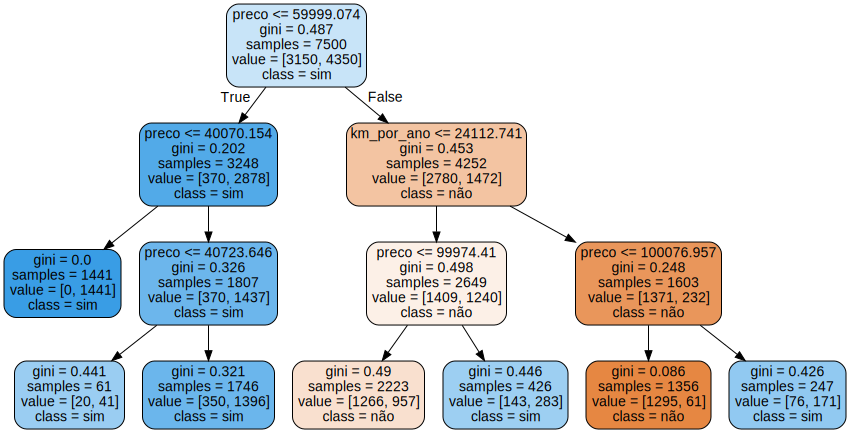

In [29]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data  =  export_graphviz(modelo, out_file = None, feature_names = features,
                             filled = True, rounded = True, class_names = ["não","sim"] )
grafico =  graphviz.Source(dot_data)
grafico